In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PlateData import *

from mpl_interactions import hyperslicer

In [2]:
def read_assay_excel(filename, nrows, sheet_name = "Plate 1", header_length=36, directory="./"):

    '''A data structure to read in data from a simple plate reader assay'''

    # Read in the excel page for that sheet
    X = pd.read_excel(directory + filename, sheet_name = sheet_name, header = header_length, nrows = nrows)

    # Only take lines where not ALL values are NaN
    try:
        X = X.loc[np.mean(np.isnan(X[X.columns[3:]]), axis=1) < 1]
    except:
        print("Couldn't find column A1 in sheet", n)
        print("pd.read_excel("+directory+filename+", sheet_name = "+sheet+", header = "+str(header_length)+", nrows = "+str(nrows[n])+")")

    X["Time"] = [time.hour*60 + time.minute + time.second / 60 for time in X["Time"]]

    # create a unified index for the datapoints
    X.index = np.arange(len(X))

    return X


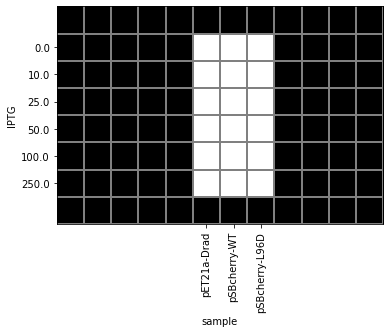

In [3]:
directory =  "/Users/sam/Dropbox (Harvard University)/Data/"
filename = "012023.xlsx"

RFU = read_assay_excel(filename, header_length=36, nrows = (217-36), directory=directory, sheet_name = "Plate 1")
OD600 = read_assay_excel(filename, header_length=221, nrows = (217-36), directory=directory, sheet_name = "Plate 1")

row_annotations = {'use_row': [False] + [True]*6 + [False],
                   'IPTG': [np.nan, 0, 10, 25, 50, 100, 250, np.nan]}

col_annotations = {'sample': ['NaN']*5 + ['pET21a-Drad', 'pSBcherry-WT', 'pSBcherry-L96D'] + ['NaN']*4,
                   'use_col': [False]*5 + [True]*3 + [False]*4}

Exp_0120 = PlateAssay((RFU, OD600), df_keys=("RFU", "OD"), 
                 row_annotations=row_annotations, col_annotations=col_annotations)

Exp_0120.draw(row_annotations="IPTG", col_annotations="sample")

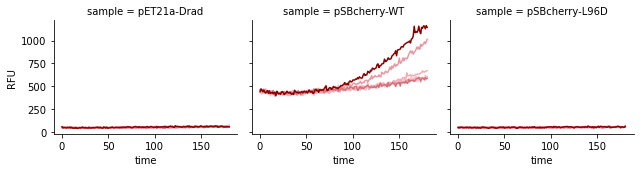

In [4]:
Exp_0120.grid("RFU", hue="IPTG", col="sample", aspect=1.2,
             palette=sns.blend_palette(['pink', 'darkred'], as_cmap=True))

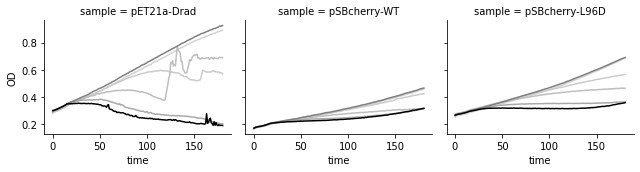

In [5]:
Exp_0120.grid("OD", hue="IPTG", col="sample", aspect=1.2,
             palette=sns.blend_palette(['lightgray', 'black'], as_cmap=True))